In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential

/home/ranojoy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
current_location = os.getcwd()
data_location = "data/"

In [3]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [4]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [5]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [6]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [7]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


In [8]:
input_ = []
target_ = []

input_size = 8

for k in range(len(data_prep)):
    for m in range(10 - input_size):
        input_.append(data_prep[k][m:input_size + m])
        target_.append(data_prep[k][input_size + m])

In [9]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k] - 1] = 1
    target.append(a)

In [10]:
print (input_[0], target[0])
print (len(input_))

[1, 3, 2, 2, 3, 3, 1, 2] [0, 0, 1]
164


In [11]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [12]:
print (trainX[0], trainY[0], input_[0])

[1 3 2 2 3 3 1 2] [0 0 1] [1, 3, 2, 2, 3, 3, 1, 2]


In [37]:
model = Sequential()

model.add(Dense(len(trainX[0]), input_dim = len(trainX[0]), activation='relu', kernel_initializer='normal'))
model.add(Dense(200, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history = model.fit(trainX, trainY, epochs=100, batch_size=50, verbose=1, validation_data = (validateX, validateY), shuffle = True)

Train on 98 samples, validate on 33 samples
Epoch 1/100
98/98 [==============================] - 1s 7ms/step - loss: 1.1013 - acc: 0.3163 - val_loss: 1.0965 - val_acc: 0.3333
Epoch 2/100
98/98 [==============================] - 0s 240us/step - loss: 1.0974 - acc: 0.3163 - val_loss: 1.0948 - val_acc: 0.4545
Epoch 3/100
98/98 [==============================] - 0s 240us/step - loss: 1.0961 - acc: 0.3980 - val_loss: 1.0936 - val_acc: 0.5152
Epoch 4/100
98/98 [==============================] - 0s 199us/step - loss: 1.0933 - acc: 0.4898 - val_loss: 1.0928 - val_acc: 0.4848
Epoch 5/100
98/98 [==============================] - 0s 226us/step - loss: 1.0918 - acc: 0.5000 - val_loss: 1.0921 - val_acc: 0.3939
Epoch 6/100
98/98 [==============================] - 0s 108us/step - loss: 1.0906 - acc: 0.4490 - val_loss: 1.0912 - val_acc: 0.3939
Epoch 7/100
98/98 [==============================] - 0s 111us/step - loss: 1.0884 - acc: 0.4592 - val_loss: 1.0900 - val_acc: 0.4242
Epoch 8/100
98/98 [========

Epoch 62/100
98/98 [==============================] - 0s 444us/step - loss: 0.7977 - acc: 0.6429 - val_loss: 0.9788 - val_acc: 0.6061
Epoch 63/100
98/98 [==============================] - 0s 182us/step - loss: 0.7952 - acc: 0.6429 - val_loss: 0.9769 - val_acc: 0.6061
Epoch 64/100
98/98 [==============================] - 0s 161us/step - loss: 0.7921 - acc: 0.6531 - val_loss: 0.9729 - val_acc: 0.6364
Epoch 65/100
98/98 [==============================] - 0s 146us/step - loss: 0.7942 - acc: 0.6531 - val_loss: 0.9700 - val_acc: 0.6364
Epoch 66/100
98/98 [==============================] - 0s 313us/step - loss: 0.7915 - acc: 0.6429 - val_loss: 0.9777 - val_acc: 0.6061
Epoch 67/100
98/98 [==============================] - 0s 129us/step - loss: 0.7859 - acc: 0.6531 - val_loss: 0.9787 - val_acc: 0.6364
Epoch 68/100
98/98 [==============================] - 0s 190us/step - loss: 0.7835 - acc: 0.6531 - val_loss: 0.9816 - val_acc: 0.6061
Epoch 69/100
98/98 [==============================] - 0s 148us

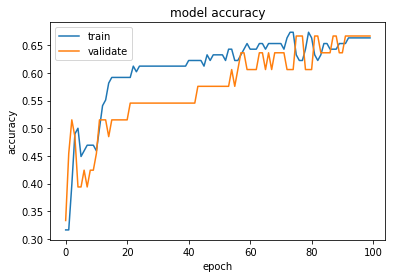

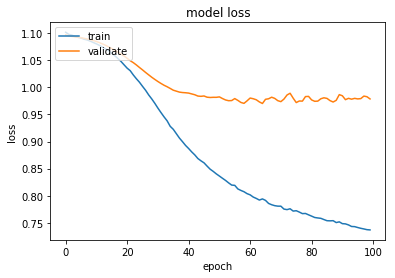

In [40]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [41]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

98/98 [==============================] - 0s 143us/step
Train acc: 66.33%
33/33 [==============================] - 0s 297us/step
Train acc: 66.67%
33/33 [==============================] - 0s 375us/step
Train acc: 54.55%


In [42]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]


In [43]:
sequence = ['A', 'C', 'A', 'B', 'C', 'B', 'A', 'C']

sqd = []
for k in range(len(sequence)):
    sqd.append(ord(sequence[k]) - ord('A') + 1)

predictions = model.predict(np.array([sqd])) 

a = [0]*3
maxx = max(predictions[0])
pos = 0
for m in range(len(predictions[0])):
    if predictions[0][m] == maxx:
        pos = m
        break
a[pos] = 1

print (sqd, a)

if a[0] == 1:
    print ('A')
elif a[1] == 1:
    print ('B')
else:
    print ('C')

[1, 3, 1, 2, 3, 2, 1, 3] [0, 0, 1]
C


In [44]:
model_json = model.to_json()
with open("model/model_9th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_9th.h5")
print("Saved model to disk")

Saved model to disk
